# To test out wide to long in pandas

- Read the data from HandBookData.xlsx
- read only the required cells [A1:AB1827]
- change from wide to long using pandas functionality.
- Use the statistics obtained from test1 notebook
- Write a model using SVR using multiple variables.
- Look for a way to tune the model

In [1]:
import pandas as pd
import numpy as np
import openpyxl
from datetime import datetime, timedelta
from os.path import join, splitext

In [2]:
data = pd.read_excel('HandBookData.xlsx', sheet_name='DPLLoad', engine='openpyxl', usecols='A:AB', nrows=1826)

data.sample(5)

,Season,Month,DOW,DT,HR1,HR2,HR3,HR4,HR5,HR6,...,HR15,HR16,HR17,HR18,HR19,HR20,HR21,HR22,HR23,HR24
1279,Summer,7,Sunday,2016-07-03,1466,1383.0,1331.0,1292,1274,1283,...,1599,1588,1572,1556,1539,1507,1500,1523,1475,1415
1285,Summer,7,Saturday,2016-07-09,1968,1788.0,1682.0,1581,1558,1542,...,2220,2253,2284,2305,2281,2201,2096,2023,1921,1762
1595,Spring,5,Monday,2017-05-15,1532,1455.0,1407.0,1403,1398,1483,...,2108,2144,2187,2190,2185,2149,2118,2126,1952,1782
1390,Fall,10,Saturday,2016-10-22,1532,1462.0,1418.0,1402,1406,1440,...,1634,1602,1595,1594,1619,1705,1695,1642,1574,1493
41,Winter,2,Monday,2013-02-11,1648,1615.0,1593.0,1584,1638,1768,...,2133,2118,2130,2196,2309,2326,2272,2192,2058,1946


In [3]:
data.head()

,Season,Month,DOW,DT,HR1,HR2,HR3,HR4,HR5,HR6,...,HR15,HR16,HR17,HR18,HR19,HR20,HR21,HR22,HR23,HR24
0,Winter,1,Tuesday,2013-01-01,1723,1674.0,1622.0,1595,1591,1629,...,1900,1906,1934,2089,2184,2173,2149,2084,2005,1934
1,Winter,1,Wednesday,2013-01-02,1874,1846.0,1851.0,1865,1921,2067,...,2307,2285,2307,2468,2564,2555,2507,2443,2323,2204
2,Winter,1,Thursday,2013-01-03,2141,2105.0,2076.0,2094,2133,2254,...,2314,2287,2305,2444,2527,2489,2439,2350,2227,2087
3,Winter,1,Friday,2013-01-04,1989,1942.0,1897.0,1907,1955,2086,...,2225,2188,2204,2325,2435,2404,2366,2293,2185,2060
4,Winter,1,Saturday,2013-01-05,1961,1914.0,1879.0,1880,1897,1967,...,1944,1961,2005,2104,2169,2125,2086,2017,1931,1825


In [4]:
long_data = pd.wide_to_long(data, stubnames='HR', i=['Season','Month','DT','DOW'], j='hour')

long_data.sample(5)

,,,,,HR
Season,Month,DT,DOW,hour,
Summer,8,2014-08-08,Friday,5,1540.0
Spring,5,2017-05-04,Thursday,5,1535.0
Fall,10,2016-10-25,Tuesday,7,1898.0
Spring,4,2014-04-14,Monday,2,1404.0
Fall,11,2015-11-12,Thursday,5,1564.0


In [5]:
long_data.reset_index(inplace=True)

long_data.sample(5)

,Season,Month,DT,DOW,hour,HR
33347,Fall,10,2016-10-21,Friday,12,1998.0
8564,Winter,12,2013-12-23,Monday,21,2252.0
37123,Spring,3,2017-03-27,Monday,20,1870.0
29312,Spring,5,2016-05-06,Friday,9,1930.0
7229,Fall,10,2013-10-29,Tuesday,6,1801.0


Lets make some plots
- data from 2017 during seasons at hour 1

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.constants import golden as phi

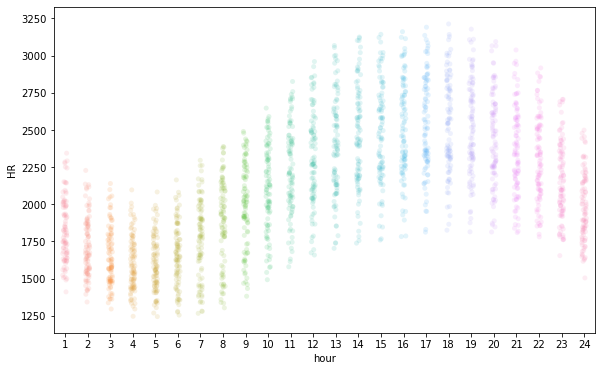

In [7]:
data = long_data.loc[(long_data['DT'].dt.year == 2017) & (long_data['Season'] == 'Summer')]

height = 6
fig = plt.figure(figsize=(phi * height,height))
sns.stripplot(data = data, x='hour', y='HR',alpha=0.15)

- Turn values into categorical

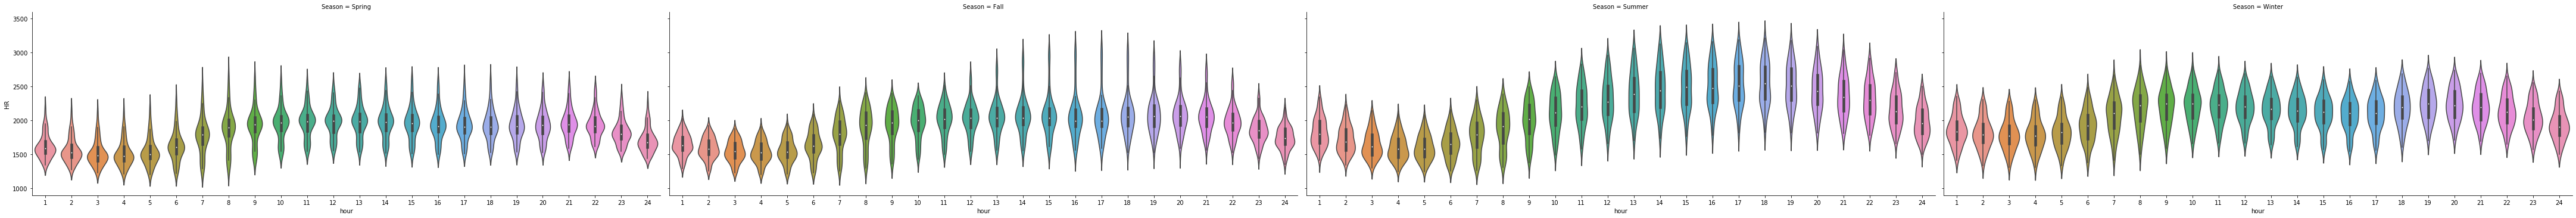

In [8]:
data = long_data.loc[(long_data['DT'].dt.year == 2017)]

sns.catplot(data = data, x='hour', y='HR',alpha=0.15, col='Season', kind='violin', aspect=3, col_order=['Spring','Fall','Summer','Winter'])

**2017 Sesonal trend**

We can see that in 2017 Spring and Fall have quite consistent points, they are clustered close to each other. On the other hand Summer and Winter data is quite scattered. 

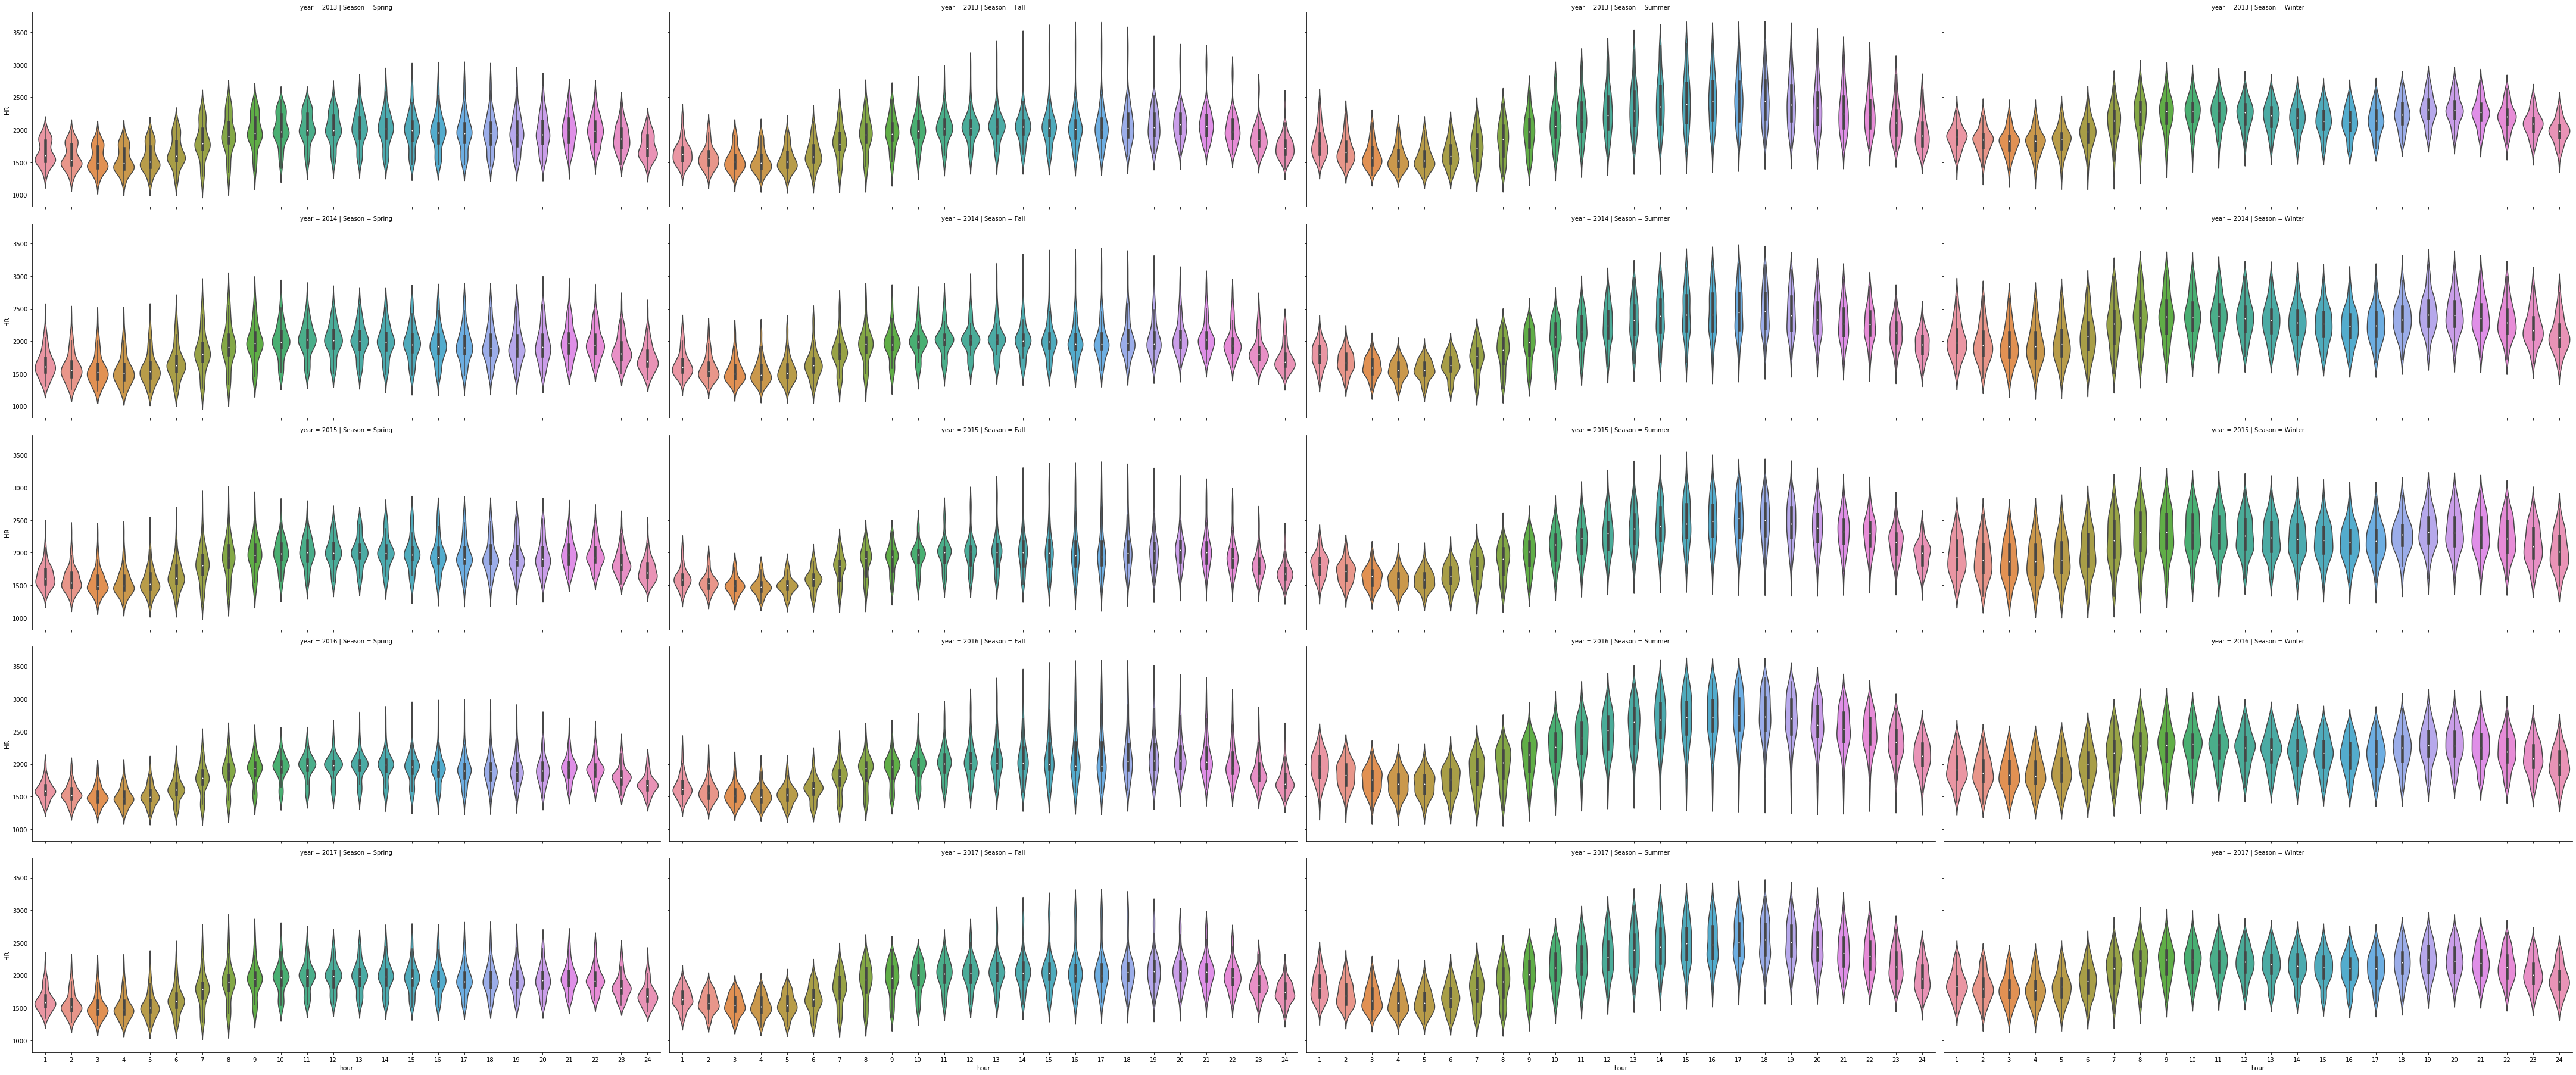

In [9]:
data = long_data.copy(deep=True)

data['year'] = data['DT'].dt.year

sns.catplot(data = data, x='hour', y='HR',alpha=0.15, col='Season', row='year', kind='violin', aspect=3, col_order=['Spring','Fall','Summer','Winter'])

We can see that for all the years the hourly load in spring and fall is quite consistent over all the days while just like 2017, the hourly load in summer and winter is quite spread out.

In [10]:
long_data['Season'] = long_data['Season'].astype('category')

In [11]:
labels = ['Night', 'Day', 'Day','Night']

long_data['TimeOfDay'] = pd.cut(long_data['hour'].values, bins=range(0,25,6), right=True, labels = labels, ordered=False)

long_data.sample(5)

,Season,Month,DT,DOW,hour,HR,TimeOfDay
38613,Spring,5,2017-05-28,Sunday,22,1750.0,Night
38776,Summer,6,2017-06-04,Sunday,17,2358.0,Day
20807,Spring,5,2015-05-17,Sunday,24,1902.0,Night
36064,Winter,2,2017-02-11,Saturday,17,1647.0,Day
34095,Fall,11,2016-11-21,Monday,16,2082.0,Day


In [12]:
long_data['Season']

0        Winter
1        Winter
2        Winter
3        Winter
4        Winter
          ...  
43819    Winter
43820    Winter
43821    Winter
43822    Winter
43823    Winter
Name: Season, Length: 43824, dtype: category
Categories (4, object): ['Fall', 'Spring', 'Summer', 'Winter']

In [13]:
weather_data = pd.read_excel('HandBookData.xlsx', sheet_name='DPLWeather', engine='openpyxl')

weather_data.sample(5)

,dt,MaxTemp,AvgTemp,LowTemp,MaxDewPoint,AvgDepPoint,LowDewPoint,MaxRelHumidity,AvgRelHumidity,LowHumidity,...,AvgPressure,LowPressure,MaxVisibility,AvgVisibility,LowVisibility,MaxWindSpeed,AvgWindSpeed,MaxGust,Precipitation,EventCategory
477,2014-04-23,59.0,47.0,34.0,34.0,32.0,29.0,82.0,61.0,39.0,...,30.07,29.98,10.0,10.0,10.0,14.0,7.0,17,0,99.0
535,2014-06-20,83.0,75.0,67.0,72.0,69.0,66.0,97.0,86.0,74.0,...,29.99,29.92,10.0,8.0,2.0,16.0,5.0,20,0.27,15.0
359,2013-12-26,37.0,33.0,28.0,26.0,21.0,17.0,85.0,66.0,47.0,...,30.28,30.15,10.0,10.0,9.0,24.0,14.0,29,0,99.0
402,2014-02-07,13.0,4.0,-5.0,-1.0,-5.0,-10.0,79.0,69.0,58.0,...,30.47,30.41,10.0,10.0,10.0,16.0,6.0,20,0,99.0
1287,2016-07-11,87.0,75.0,63.0,64.0,62.0,59.0,93.0,67.0,40.0,...,30.05,30.00,10.0,10.0,10.0,12.0,5.0,14,0,99.0


In [14]:
complete_data = long_data.set_index('DT').join(weather_data.set_index('dt'))

complete_data.reset_index(inplace=True)
complete_data.sample(5)

,index,Season,Month,DOW,hour,HR,TimeOfDay,MaxTemp,AvgTemp,LowTemp,...,AvgPressure,LowPressure,MaxVisibility,AvgVisibility,LowVisibility,MaxWindSpeed,AvgWindSpeed,MaxGust,Precipitation,EventCategory
8952,2014-01-09,Winter,1,Thursday,1,2182.0,Night,34.0,26.0,18.0,...,30.44,30.30,10.0,5.0,0.0,14.0,7.0,17,0.15,8.0
13940,2014-08-04,Summer,8,Monday,21,2517.0,Night,87.0,74.0,60.0,...,30.11,30.07,10.0,9.0,2.0,22.0,4.0,25,0.48,11.0
38052,2017-05-05,Spring,5,Friday,13,2080.0,Day,49.0,46.0,43.0,...,29.56,29.47,10.0,4.0,2.0,32.0,20.0,40,0.93,11.0
4785,2013-07-19,Summer,7,Friday,10,2795.0,Day,92.0,84.0,76.0,...,29.97,29.88,10.0,7.0,5.0,20.0,11.0,25,0,99.0
20478,2015-05-04,Spring,5,Monday,7,1673.0,Day,78.0,70.0,61.0,...,30.15,30.07,10.0,10.0,3.0,23.0,10.0,31,0.31,15.0


In [15]:
data = complete_data.loc[complete_data['index'].dt.year == 2017]

data.tail()

,index,Season,Month,DOW,hour,HR,TimeOfDay,MaxTemp,AvgTemp,LowTemp,...,AvgPressure,LowPressure,MaxVisibility,AvgVisibility,LowVisibility,MaxWindSpeed,AvgWindSpeed,MaxGust,Precipitation,EventCategory
43819,2017-12-31,Winter,12,Sunday,20,2484.0,Night,11.0,3.0,-5.0,...,30.5,30.41,10.0,7.0,1.0,10.0,6.0,12,0.05,NaN
43820,2017-12-31,Winter,12,Sunday,21,2452.0,Night,11.0,3.0,-5.0,...,30.5,30.41,10.0,7.0,1.0,10.0,6.0,12,0.05,NaN
43821,2017-12-31,Winter,12,Sunday,22,2421.0,Night,11.0,3.0,-5.0,...,30.5,30.41,10.0,7.0,1.0,10.0,6.0,12,0.05,NaN
43822,2017-12-31,Winter,12,Sunday,23,2375.0,Night,11.0,3.0,-5.0,...,30.5,30.41,10.0,7.0,1.0,10.0,6.0,12,0.05,NaN
43823,2017-12-31,Winter,12,Sunday,24,2345.0,Night,11.0,3.0,-5.0,...,30.5,30.41,10.0,7.0,1.0,10.0,6.0,12,0.05,NaN


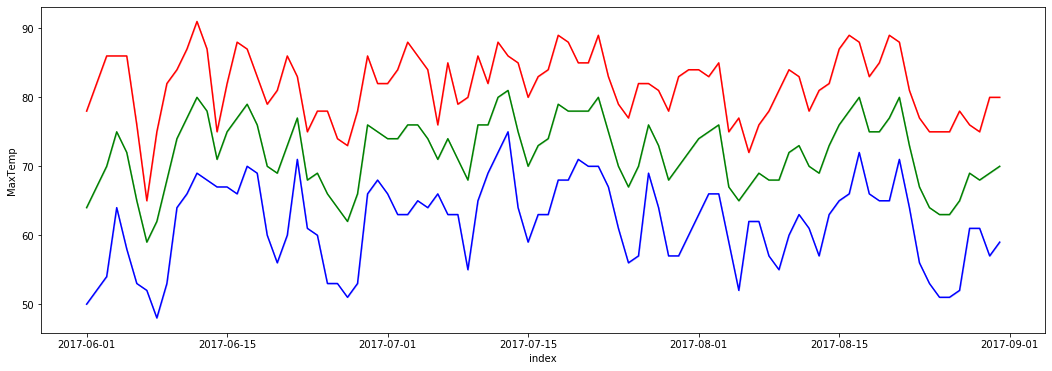

In [16]:
data = complete_data.loc[(complete_data['index'].dt.year == 2017) & (complete_data['Season'] == 'Summer')]
fig = plt.figure(figsize=(6*3, 6))
sns.lineplot(data=data, x='index', y='MaxTemp', color='r')
sns.lineplot(data=data, x='index', y='LowTemp', color='b')
sns.lineplot(data=data, x='index', y='AvgTemp', color='g')
# sns.relplot(data=data, x='index', y='MaxTemp','LowTemp', kind='line', aspect=3)

In [17]:
data = complete_data.copy(deep=True)
data['MaxGustNew'] = data['MaxGust'].replace('-', '0', regex=False)

# data.loc[data['MaxGustNew'].notna()]
complete_data['MaxGust'] = data['MaxGustNew']
complete_data['MaxGust'] = complete_data['MaxGust'].astype(np.float64)

In [18]:
complete_data['EventCategory'] = complete_data['EventCategory'].fillna('99')
complete_data['EventCategory'] = complete_data['EventCategory'].astype('category')
complete_data['DOW'] = complete_data['DOW'].astype('category')
complete_data['Month'] = complete_data['Month'].astype('category')
complete_data['hour'] = complete_data['hour'].astype('category')

In [19]:
complete_data['Precipitation'] = complete_data['Precipitation'].replace('T', '99', regex=False)
complete_data['Precipitation'] = complete_data['Precipitation'].astype(np.float64)

In [20]:
complete_data.rename(columns = {'HR':'load'}, inplace = True)
complete_data.dtypes

index             datetime64[ns]
Season                  category
Month                   category
DOW                     category
hour                    category
load                     float64
TimeOfDay               category
MaxTemp                  float64
AvgTemp                  float64
LowTemp                  float64
MaxDewPoint              float64
AvgDepPoint              float64
LowDewPoint              float64
MaxRelHumidity           float64
AvgRelHumidity           float64
LowHumidity              float64
MaxPressure              float64
AvgPressure              float64
LowPressure              float64
MaxVisibility            float64
AvgVisibility            float64
LowVisibility            float64
MaxWindSpeed             float64
AvgWindSpeed             float64
MaxGust                  float64
Precipitation            float64
EventCategory           category
dtype: object

In [21]:
complete_data = complete_data.dropna()

In [32]:
# Let's just take a minimalistic number of fields for a simple model

data = complete_data[['Season','DOW','hour','load','AvgTemp']]
data.dtypes

Season     category
DOW        category
hour       category
load        float64
AvgTemp     float64
dtype: object

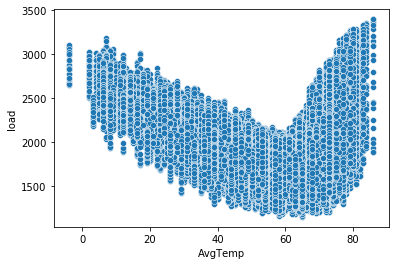

In [33]:
sns.scatterplot(data = data, x='AvgTemp',y='load')

In [34]:
# Let's make 24 data arrays to create 24 equations (one for each hour)
datas = []
for i in range(1,25):
    datas.append(data.loc[data['hour'] == i])
    
datas[0].head()
                          

,Season,DOW,hour,load,AvgTemp
0,Winter,Tuesday,1,1723.0,26.0
24,Winter,Wednesday,1,1874.0,16.0
48,Winter,Thursday,1,2141.0,20.0
72,Winter,Friday,1,1989.0,24.0
96,Winter,Saturday,1,1961.0,28.0


In [35]:
# Let's add polynomial values for avgTemp
for d in datas:
    d.loc[:,'AvgTemp2'] = d.loc[:,'AvgTemp'].apply(lambda x: x**2)
    d.loc[:,'AvgTemp3'] = d.loc[:,'AvgTemp'].apply(lambda x: x**3)
datas[0].head()

C:\Users\dshukla\AppData\Local\Programs\Python\Python36\Lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\dshukla\AppData\Local\Programs\Python\Python36\Lib\site-packages\pandas\core\indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Season,DOW,hour,load,AvgTemp,AvgTemp2,AvgTemp3
0,Winter,Tuesday,1,1723.0,26.0,676.0,17576.0
24,Winter,Wednesday,1,1874.0,16.0,256.0,4096.0
48,Winter,Thursday,1,2141.0,20.0,400.0,8000.0
72,Winter,Friday,1,1989.0,24.0,576.0,13824.0
96,Winter,Saturday,1,1961.0,28.0,784.0,21952.0


In [36]:
# Let's apply OneHotEncoding to DOW, Month in the data
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore")
ohe.fit(data[['Season', 'DOW']])

final_datas = []

for d in datas:
    ohe_values = ohe.transform(d[['Season','DOW']]).toarray()
    d.drop(['Season','DOW', 'hour'], axis=1, inplace=True)
    final_datas.append(np.concatenate((d.values, ohe_values), axis=1))
# final_datas[0]

C:\Users\dshukla\AppData\Local\Programs\Python\Python36\Lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\dshukla\AppData\Local\Programs\Python\Python36\Lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\dshukla\AppData\Local\Programs\Python\Python36\Lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#r

In [27]:
for d in final_datas:
    print(d.shape)

(1826, 18)
(1821, 18)
(1821, 18)
(1826, 18)
(1826, 18)
(1826, 18)
(1826, 18)
(1826, 18)
(1826, 18)
(1826, 18)
(1826, 18)
(1826, 18)
(1826, 18)
(1826, 18)
(1826, 18)
(1826, 18)
(1826, 18)
(1826, 18)
(1826, 18)
(1826, 18)
(1826, 18)
(1826, 18)
(1826, 18)
(1826, 18)


In [28]:
final_datas[0][0]

array([1.7230e+03, 2.6000e+01, 6.7600e+02, 1.7576e+04, 2.6000e+01,
       6.7600e+02, 1.7576e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+00, 0.0000e+00])

In [37]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = False)

# Let's just do it for final_datas[0]

x_data = final_datas[0][:,1:]
y_data = final_datas[0][:,0]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1)

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.7386211909045849

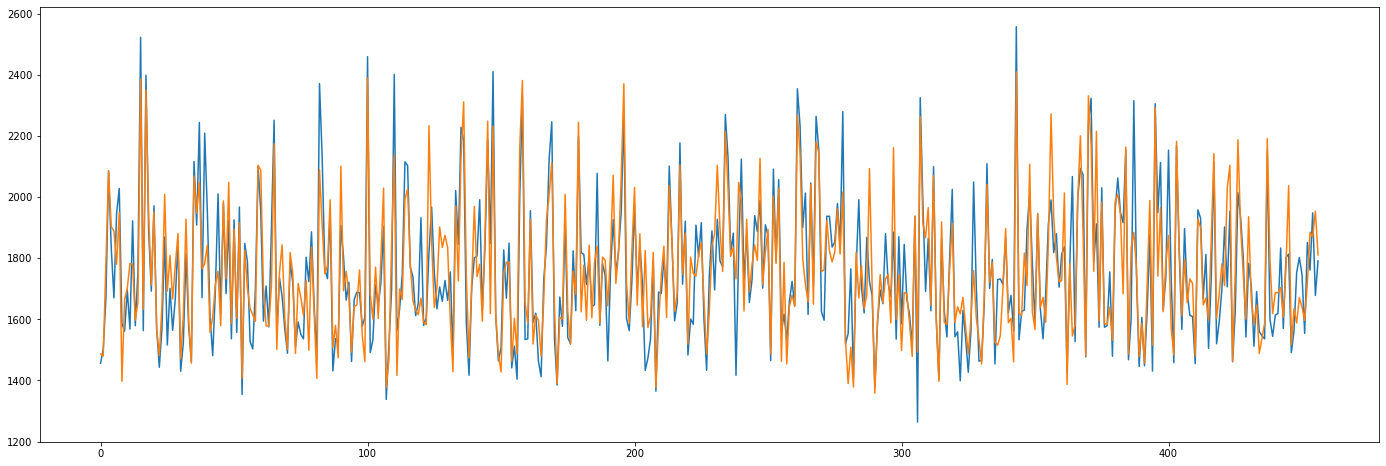

In [38]:
fig = plt.figure(figsize=(24,8))
plt.plot(y_test)
plt.plot(model.predict(x_test))